In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [9]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [10]:
# GLOBAL SETTINGS:
DATASET_URL = r"/gdrive/MyDrive/Colab Notebooks/1M-PD/train.csv"

In [11]:
def evaluateData(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accuracy_test = []
    models = [DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier]
    for m in models:
        print('#############################################')
        print('######-Model =>\033[07m {} \033[0m'.format(m))
        model_ = m()
        model_.fit(X_train, y_train)
        predict = model_.predict(X_test)
        acc = accuracy_score(predict, y_test)
        accuracy_test.append(acc)
        print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc * 100))
        print('\033[01m              Classification_report \033[0m')
        print(classification_report(y_test, predict))
        print('\033[01m             Confusion_matrix \033[0m')
        cf_matrix = confusion_matrix(y_test, predict)
        plot_ = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='0.2%')
        plt.show()
        print('\033[31m###################- End -###################\033[0m')

    output = pd.DataFrame({"Model": ['Decision Tree Classifier', 'Random Forest Classifier', 'KNeighbors Classifier'],
                           "Accuracy": accuracy_test})
    print(output)

In [14]:
def preprocessing_DATA():
    data = pd.read_csv(DATASET_URL, sep=",", encoding="utf-8")
    no_label_index = list(
        data.loc[(data['label'] != '1') & (data['label'] != 0) & (data['label'] != '0') & (data['label'] != 1)].index)
    data = data.drop(index=no_label_index)
    data = data.drop(columns=["url", "code", "scheme", "domain", "subdomain", "second_domain", "tld", "url_path", "words_raw"], axis=1)
    data = data.reset_index(drop=True)
    return data

In [15]:
data = preprocessing_DATA()
X = data.drop(columns=['label'], axis=1)
y = data['label'].apply(lambda x: int(x))

#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  96.50%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     87018
           1       0.97      0.96      0.97     92880

    accuracy                           0.97    179898
   macro avg       0.96      0.97      0.97    179898
weighted avg       0.97      0.97      0.97    179898

             Confusion_matrix 


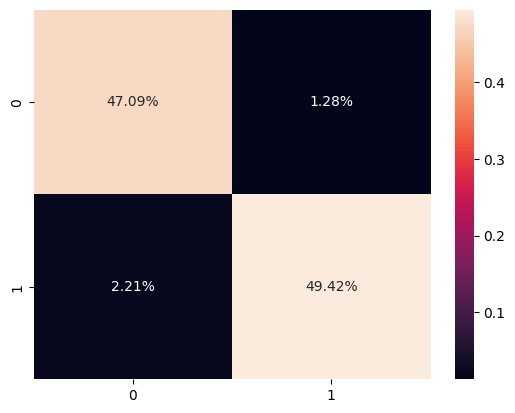

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  97.34%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     87018
           1       0.97      0.98      0.97     92880

    accuracy                           0.97    179898
   macro avg       0.97      0.97      0.97    179898
weighted avg       0.97      0.97      0.97    179898

             Confusion_matrix 


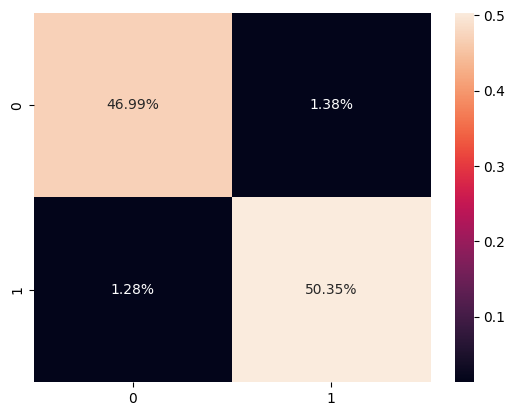

###################- End -###################
#############################################
######-Model => <class 'sklearn.neighbors._classification.KNeighborsClassifier'> 
Test Accuracy :  96.48%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     87018
           1       0.96      0.97      0.97     92880

    accuracy                           0.96    179898
   macro avg       0.96      0.96      0.96    179898
weighted avg       0.96      0.96      0.96    179898

             Confusion_matrix 


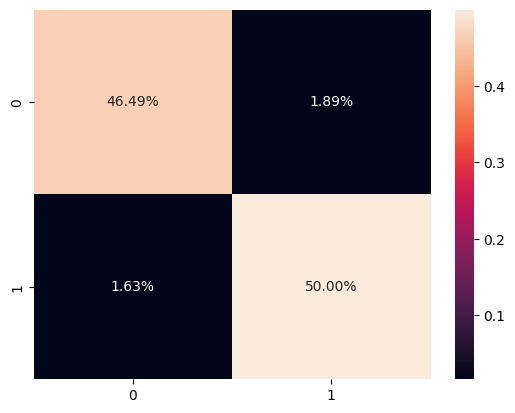

###################- End -###################
                      Model  Accuracy
0  Decision Tree Classifier  0.965036
1  Random Forest Classifier  0.973402
2     KNeighbors Classifier  0.964847


In [16]:
evaluateData(X, y)